**<center> <span style="color:#0F52BA;font-family:serif; font-size:34px;"> TELECOM CUSTOMER CHURN PREDICTION 📈</span> </center>**

<style>
img
{
    display:block; 
    float:none; 
    margin-left:auto;
    margin-right:auto;
    width:80%;
}
</style> 

<center><span style="font-family:Palatino; font-size:22px;"><i> Did you know that attracting a new customer costs <span style="color:#DC143C;">five times</span> as much as keeping an existing one?</i></span> </center>

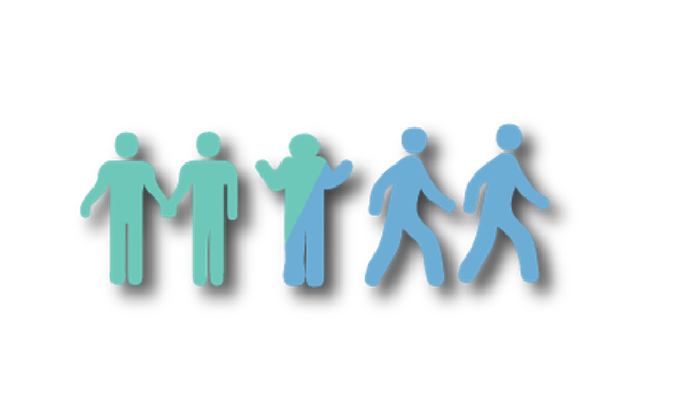

# <span style="font-family:serif; font-size:28px;"> Content</span>

1. [Introduction](#1)
    * [What is Customer Churn?](#2)
    * [How can customer churn be reducded?](#3)
    * [Objectives](#4)
2. [Loading libraries and data](#5)
3. [Undertanding the data](#6)
4. [Visualize missing values](#7)
5. [Data Manipulation](#8)
6. [Data Visualization](#9)
7. [Data Preprocessing](#10)
   * [Standardizing numeric attributes](#111)
8. [Machine Learning Model Evaluations and Predictions](#11)
   * [KNN](#101)
   * [SVC](#102)
   * [Random Forest](#103)
   * [Logistic Regression](#104)
   * [Decision Tree Classifier](#105)
   * [AdaBoost Classifier](#106)
   * [Gradient Boosting Classifier](#107)
   * [Voting Classifier](#108)



<a id = "1" ></a>
# <span style="font-family:serif; font-size:28px;"> 1. Introduction</span>
<a id = "introduction" ></a>

<a id = "2" ></a>
#### <b>What is Customer Churn?</b>
<span style="font-size:16px;">  Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service. </span>

<span style="font-size:16px;"> Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.</span>

<span style="font-size:16px;"> Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more
customers loyalty. The core to succeed in this market lies in the customer itself. 
</span>

<span style="font-size:16px;"> Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.</span>

<a id="churn"></a>
<a id = "3" ></a>

<span style="font-size:16px;"><b>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</b></span> 

<span style="font-size:16px;"> To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few. </span> 

<span style="font-size:16px;">As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy. </span> 
<a id="reduce"></a>

<a id = "4" ></a>
#### <b> Objectives</b>
I will explore the data and try to answer some questions like:
* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on the gender?
* Is there any patterns/preference in Churn Customers based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Many more questions that will arise during the analysis
<a id="objective"></a>

___

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> 2. Loading libraries and data</span>
<a id="loading"></a>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
#loading data
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

___

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Undertanding the data</span>
<a id = "Undertanding the data" ></a>

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [ ]:
df.head()

**The data set includes information about:**
* **Customers who left within the last month** – the column is called Churn

* **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* **Customer account information** - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.columns.values

In [ ]:
df.dtypes


* The target the we will use to guide the exploration is **Churn**

***

<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Visualize missing values </span>
<a id = "missingvalue" ></a>

In [ ]:
# Visualize missing values as a matrix
msno.matrix(df);

> Using this matrix we can very quickly find the pattern of missingness in the dataset. 
* From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

***

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Data Manipulation </span>
<a id = "8" ></a>

In [ ]:
df = df.drop(['customerID'], axis = 1)
df.head()

* On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

* Here we see that the TotalCharges has 11 missing values. Let's check this data.

In [ ]:
df[np.isnan(df['TotalCharges'])]

* It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

Let's see if there are any other 0 values in the tenure column.

In [ ]:
df[df['tenure'] == 0].index

* There are no additional missing values in the Tenure column. 

Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

> To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.

In [ ]:
df.fillna(df["TotalCharges"].mean())

In [ ]:
df.isnull().sum()

In [ ]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

In [ ]:
df["InternetService"].describe(include=['object', 'bool'])

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

___

<a id = "9" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Data Visualization </span>
<a id = "datavisualization" ></a>

In [ ]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

* 26.6 % of customers switched to another firm.
* Customers are 49.5 % female and 50.5 % male.

In [ ]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

In [ ]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

* There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [ ]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [ ]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.  

In [ ]:
df["InternetService"].unique()

In [ ]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

In [ ]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers without dependents are more likely to churn

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers that doesn't have partners are more likely to churn

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* It can be observed that the fraction of senior citizen is very less.
* Most of the senior citizens churn.

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Most customers churn in the absence of online security, 

In [ ]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers with Paperless Billing are most likely to churn.

In [ ]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Customers with no TechSupport are most likely to migrate to another service provider.

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Very small fraction of customers don't have a phone service and out of that, 1/3rd Customers are more likely to churn.

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');


* Customers with higher Monthly Charges are also more likely to churn

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [ ]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()


* New customers are more likely to churn

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

___

<a id = "10" ></a>
# <span style="font-family:serif; font-size:28px;"> 7. Data Preprocessing</span>
<a id = "datapreprocessing" ></a>

<a id = "1111" ></a>
#### **Splitting the data into train and test sets**
<a id = "Split" ></a>

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

In [ ]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

<a id = "111" ></a>
#### **Standardizing numeric attributes**
<a id = "Standardizing" ></a>

In [ ]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> 8. Machine Learning Model Evaluations and Predictions</span>
<a id = "modelprediction" ></a>

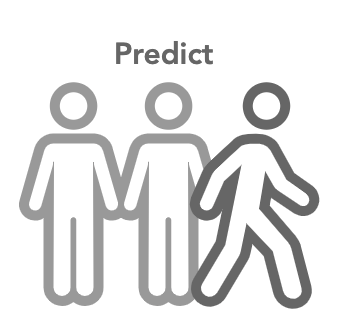

<a id = "101" ></a>
#### <b> KNN</b>
<a id = "knn" ></a>

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

In [ ]:
print(classification_report(y_test, predicted_y))

<a id = "102" ></a>
#### <b>SVC</b>
<a id = "svc" ></a>

In [ ]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

In [ ]:
print(classification_report(y_test, predict_y))

<a id = "103" ></a>
#### <b> Random Forest</b>
<a id = "rf" ></a>

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

In [ ]:
print(classification_report(y_test, prediction_test))

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

<a id = "104" ></a>
#### <b>Logistic Regression</b>
<a id = "lr" ></a>

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

<a id = "105" ></a>
#### **Decision Tree Classifier**
<a id = "dtc" ></a>

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision tree gives very low score.

In [ ]:
print(classification_report(y_test, predictdt_y))

<a id = "106" ></a>
#### **AdaBoost Classifier**
<a id = "ada" ></a>

In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

In [ ]:
print(classification_report(y_test, a_preds))

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

<a id = "107" ></a>
#### **Gradient Boosting Classifier**
<a id = "gb" ></a>

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

In [ ]:
print(classification_report(y_test, gb_pred))

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

<a id = "108" ></a>
#### **Voting Classifier**
<a id = "vc" ></a>
Let's now predict the final model based on the highest majority of voting and check it's score.

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

From the confusion matrix we can see that: 
There are total 1400+149=1549 actual non-churn values and the algorithm predicts 1400 of them as non churn and 149 of them as churn.
While there are 237+324=561 actual churn values and the algorithm predicts 237 of them as non churn values and 324 of them as churn values.

Customer churn is definitely bad to a firm ’s profitability. Various strategies can be implemented to eliminate customer churn. The best way to avoid customer churn is for a company to truly know its customers. This includes identifying customers who are at risk of churning and working to improve their satisfaction. Improving customer service is, of course, at the top of the priority for tackling this issue. Building customer loyalty through relevant experiences and specialized service is another strategy to reduce customer churn. Some firms survey customers who have already churned to understand their reasons for leaving in order to adopt a proactive approach to avoiding future customer churn. 

<span style="color:crimson;font-family:serif; font-size:20px;">  Please upvote if you liked the kernel! 😀
    <p style="color:royalblue;font-family:serif; font-size:20px;">KEEP KAGGLING!</p> 
</span>